<h1 align="center"> House Price Dataset   </h1> 

#Dataset despcription

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Names and descriptions of the columns in the provided King County dataset:



**bedrooms** - Number of bedrooms 

**bathrooms** - Number of bathrooms per floor

**sqft_living** - Square footage of the house 

**sqft_lot** - Square footage of the lot 

**floors** - Total floors (levels) in house 

**waterfront** - Whether house has a view to a waterfront 

**view** - Number of times house has been viewed 

**condition** - How good the condition is (overall) 

**grade** - Overall grade given to the housing unit, based on King County grading system 

**sqft_above** - Square footage of house (apart from basement) 

**sqft_basement** - Square footage of the basement 

**yr_built** - Year when house was built 

**yr_renovated** - Year when house was renovated 

**zipcode** - Zip code in which house is located 

**lat** - Latitude coordinate 

**long**- Longitude coordinate 

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 
 
**price** - Price is prediction target 


# Exploring the dataset

In [188]:
import numpy as np
import pandas as pd
from scipy import stats


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#!pip install 'plotly>=4.0'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets, interactive_output, interact


# import plotly.offline as offline
# offline.init_notebook_mode()

In [1]:
#put your path here
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Na GITa/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Na GITa


In [140]:
df = pd.read_csv("data/houses.csv")
df.sample(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
548,4.0,2.75,2300.0,18360.0,1.0,0.0,0.0,4.0,7.0,1560.0,740.0,1979.0,0.0,98058.0,47.4518,-122.160,1870.0,31.500
693,2.0,1.00,800.0,4342.0,1.0,0.0,0.0,3.0,6.0,670.0,130.0,1927.0,0.0,98115.0,47.6997,-122.316,1210.0,41.000
866,3.0,2.50,3460.0,6590.0,2.0,0.0,0.0,3.0,7.0,3460.0,0.0,2001.0,0.0,98056.0,47.4802,-122.188,2490.0,46.700
945,4.0,1.50,2150.0,23568.0,1.0,0.0,0.0,4.0,7.0,2150.0,0.0,1950.0,0.0,98166.0,47.4522,-122.355,2150.0,41.900
682,4.0,2.50,3190.0,7399.0,2.0,0.0,0.0,3.0,10.0,3190.0,0.0,2006.0,0.0,98038.0,47.3558,-122.004,3250.0,60.990
319,4.0,1.00,800.0,8775.0,1.0,0.0,0.0,3.0,6.0,800.0,0.0,1943.0,0.0,98166.0,47.4800,-122.336,1310.0,26.875
613,3.0,2.75,2540.0,4694.0,2.0,0.0,0.0,3.0,9.0,2540.0,0.0,2005.0,0.0,98074.0,47.6214,-122.024,2600.0,69.500
656,3.0,2.50,3930.0,55867.0,1.0,1.0,4.0,4.0,8.0,2330.0,1600.0,1957.0,0.0,98034.0,47.7022,-122.224,2730.0,307.000
11,2.0,1.00,1160.0,6000.0,1.0,0.0,0.0,4.0,7.0,860.0,300.0,1942.0,0.0,98115.0,47.6900,-122.292,1330.0,46.800
260,3.0,1.00,1660.0,4400.0,1.5,0.0,0.0,3.0,8.0,1460.0,200.0,1911.0,0.0,98112.0,47.6362,-122.302,1660.0,78.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [ ]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,308.000000


In [ ]:
df.isna().any()

bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
zipcode          True
lat              True
long             True
sqft_living15    True
price            True
dtype: bool

In [141]:
df.dropna(inplace=True)

In [ ]:
df.duplicated(keep='first').any()

False

#Interactive plot

##Searching for houses with given features (Number of houses vs price)

In [ ]:
p=px.histogram(df, x='price', opacity = 0.5, labels = { 'price': 'Price'})
p.layout.yaxis.title = 'Number of Houses'
p.show()


In [ ]:
def plot_price( bedrooms=2, bedrooms_all=False, bathrooms=1, 
               bathrooms_all=False, renovated=False, floors=1, 
               floors_all=False, waterfront=False, sqft_living_min='380.0',
               sqft_living_max='6070.0', condition=3, grade=7,		
               yr_built='1950',	reset=False
               ):
  if not reset:
    dfp=df

    if not bedrooms_all:
      dfp=dfp[dfp['bedrooms'] ==bedrooms]

    if not bathrooms_all:
      dfp=dfp[dfp['bathrooms']== bathrooms]

    if renovated:
      dfp=dfp[dfp['yr_renovated']> 0]

    if not floors_all:
      dfp=dfp[dfp['floors']== floors]

    if waterfront:
      dfp=dfp[dfp['waterfront']> 0]

    dfp=dfp[(dfp['sqft_living']>= float(sqft_living_min)) & (dfp['sqft_living']<= float(sqft_living_max))]
    
    dfp=dfp[dfp['condition']>= condition]

    dfp=dfp[dfp['grade']>= grade]

    dfp=dfp[dfp['yr_built']> float(yr_built)]
  
  
  else:
    dfp=df
        
  p=px.histogram(dfp, x='price', opacity = 0.5, labels = { 'price': 'Price'})
  p.layout.yaxis.title = 'Number of Houses'
  p.update_traces(xbins_size=5)
  p.show()

In [ ]:
plot_feats = ['bedrooms', 'bedrooms_all', 'bathrooms', 'bathrooms_all', 'floors', 'floors_all', 'sqft_living_min', 
              'sqft_living_max', 'condition',	'grade', 'yr_built','renovated', 'waterfront',	'reset'
              ]

bedrooms=widgets.IntSlider(value = 2, min=0.0, max=7.0, step=1.0, description='Bedrooms:', continuous_update=False) 
bedrooms_all=widgets.Checkbox(description= 'All bedrooms values')
bathrooms=widgets.FloatSlider(value= 1, min=0.0, max=7.0, step=0.25, description='Bathrooms:', continuous_update=False)
bathrooms_all=widgets.Checkbox(description= 'All bathrooms values')
renovated = widgets.Checkbox(description= 'Only renovated')
floors = widgets.Dropdown(options=list(np.arange(1,3.75,0.25)), value=1, description='Floors:', layout=widgets.Layout(width='50%'))
floors_all = widgets.Checkbox(description= 'All floors values')
waterfront = widgets.Checkbox(description= 'Only with waterfront')
sqft_living_min	= widgets.Text(value='380', description='Min square footage of the house:', style= {'description_width': 'initial'})
sqft_living_max	= widgets.Text(value='6070.0', description='Max square footage of the house:', style= {'description_width': 'initial'})
condition=widgets.Dropdown(options=list(np.arange(1,6,1)), value=3, description='Condition greater than or equal to:', style= {'description_width': 'initial'})
grade = widgets.Dropdown(options=list(np.arange(4,13,1)), value=7, description='Grade greater than or equal to:',style= {'description_width': 'initial'})
yr_built = widgets.Text(value = '1950', description='Built after:')
reset = widgets.Checkbox(description= 'RESET')

#ui = widgets.VBox([eval(x) for x in plot_feats])

ui = widgets.HBox([widgets.VBox([bedrooms, bedrooms_all, bathrooms, bathrooms_all]),   
                   widgets.VBox([floors, floors_all, sqft_living_min, sqft_living_max]),
                   widgets.VBox([condition,	grade, renovated, waterfront]),
                   widgets.VBox([	reset])
                   ])

out = widgets.interactive_output(plot_price, {num: eval(num) for num in plot_feats})

display(ui, out)

Output()

##Correlation beatween features

In [5]:
lower_tri = df.corr().where(np.tril(np.ones(df.corr().shape),k=0).astype(bool))

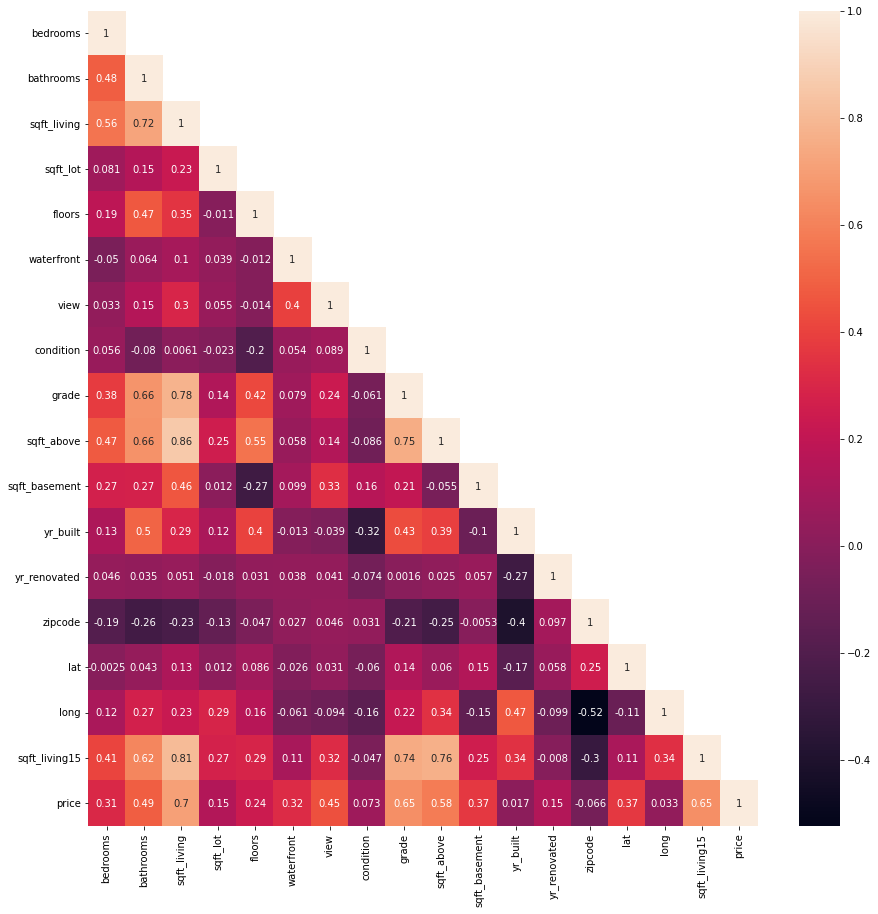

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(lower_tri, annot=True)
plt.show()

In [ ]:
px.box(df, log_y=True)

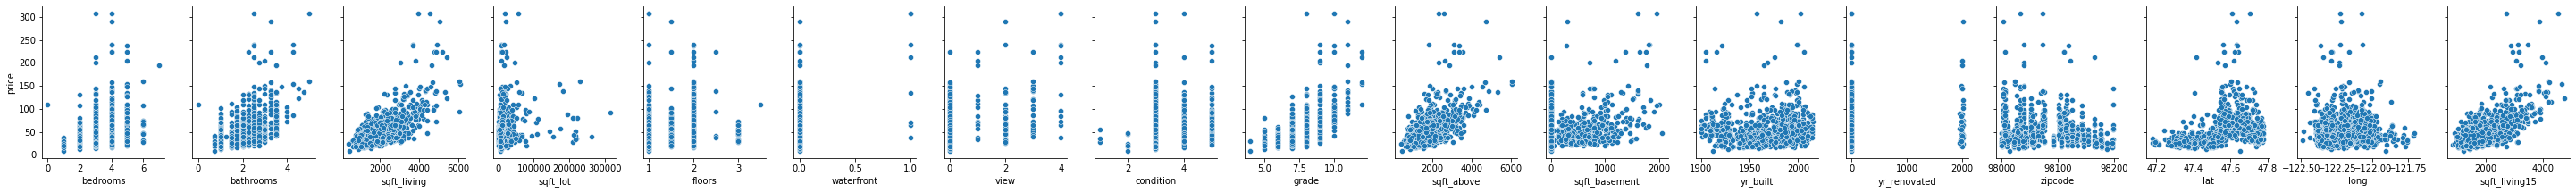

In [ ]:
feats = list(df.columns)[0:-1]
sns.pairplot(data=df, x_vars=feats, y_vars=['price'], height = 3, aspect =0.8 )

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

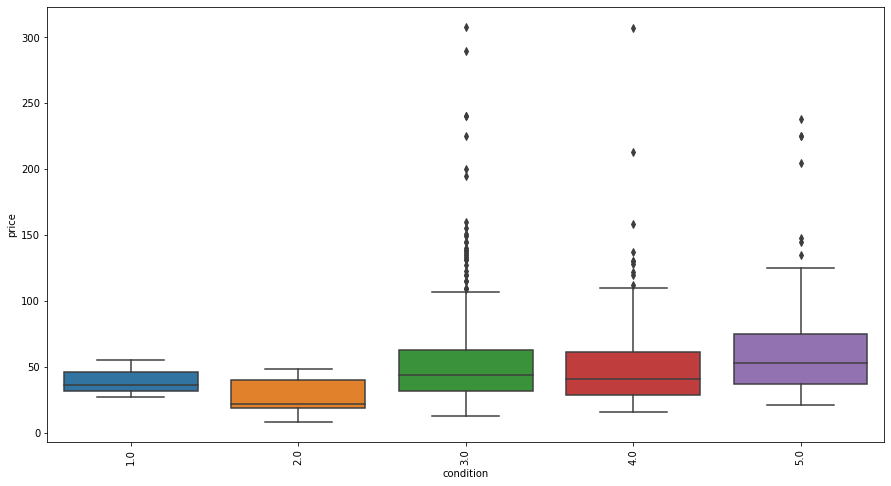

In [ ]:
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text major ticklabel objects>)

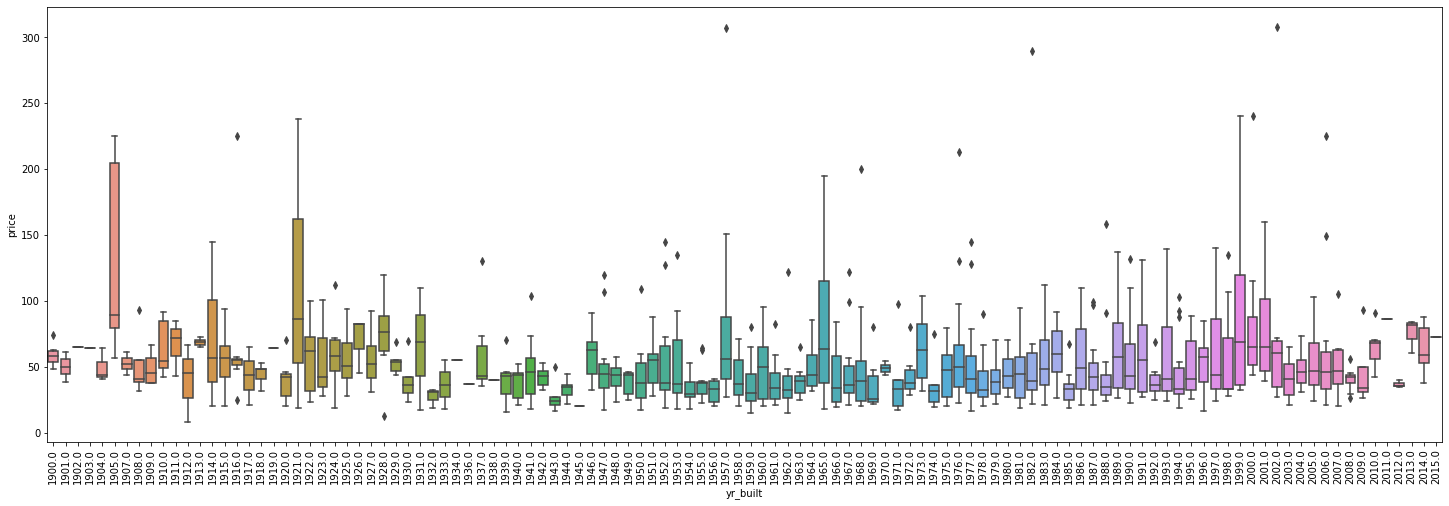

In [ ]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

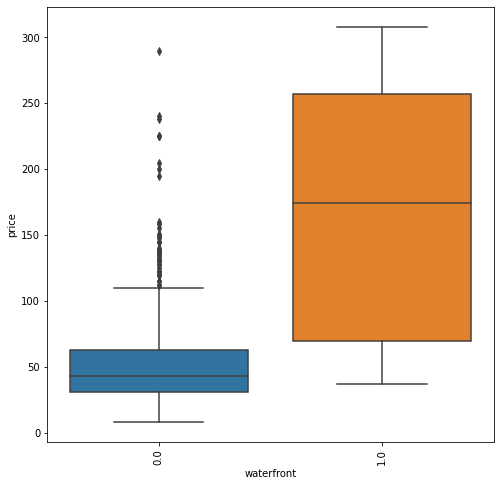

In [ ]:
var = 'waterfront'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


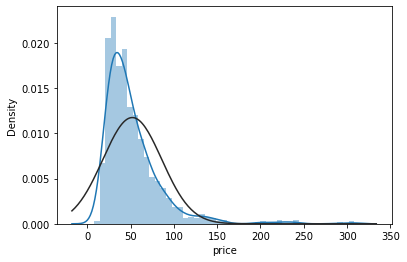

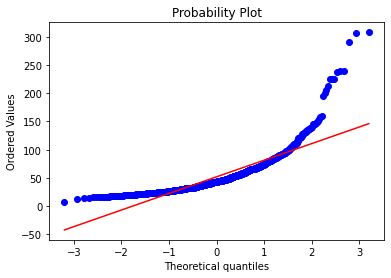

In [ ]:
sns.distplot(df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [ ]:
df['price'] = np.log(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


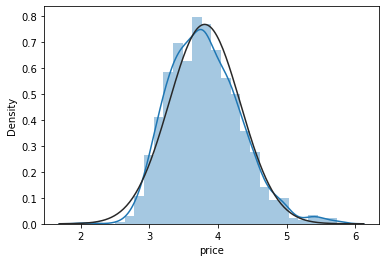

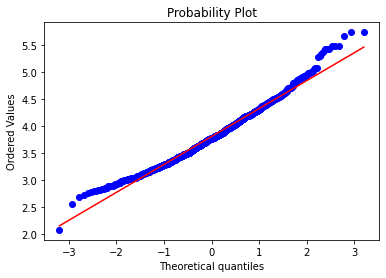

In [ ]:
sns.distplot(df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

##Ouliers

In [142]:
clf = IsolationForest( n_estimators=500, random_state = 33, contamination= 0.03)
preds = clf.fit_predict(df.iloc[:, :-1])
df=df.iloc[(preds!=-1)]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



## Data Separating

In [143]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25 , random_state = 33)

#Elastic Net Regression

##ENR with default parameters

In [144]:
en=ElasticNet() #Default hyperparameters
regressor = en.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('R2 score for default parameters:')
print(metrics.r2_score(y_test,y_pred))

R2 score for default parameters:
0.5422157827185945


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.902e+04, tolerance: 4.966e+01



###Hyperparameters adjustment

In [145]:
l1_ratio = [0.0, .05, .1, .3, .5, .7, .9, .95, .99, 1]
alphas = np.array([0.0, 0.5, 1, 2, 5, 10, 100, 1000])
enr=ElasticNetCV(l1_ratio=l1_ratio, alphas =alphas, cv=10)
regr= enr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 107337.41390977844, tolerance: 44.272488029688404

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 102624.58794260371, tolerance: 44.272488029688404

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent

In [146]:
y_pred = regr.predict(X_test)
print(f'Best R2 score:{metrics.r2_score(y_test,y_pred):.4}')
print(f"Best alpha: {regr.alpha_}")
print(f"Best l1_ratio: {regr.l1_ratio_}")

Best R2 score:0.6984
Best alpha: 0.0
Best l1_ratio: 1.0


**Best parameters values imply simple Linear Regression.**

In [ ]:
regr.coef_

array([-2.66649353e+00,  2.90033575e+00,  1.82433195e-02,  9.81680829e-06,
        3.48404327e+00,  0.00000000e+00,  4.75735757e+00,  7.55074850e-01,
        6.41466890e+00, -7.89994221e-03, -7.04789281e-03, -2.47441399e-01,
       -1.05263407e-03, -4.41109833e-02,  5.49444796e+01, -8.86148829e+00,
        7.85196821e-03])

In [ ]:
regr.intercept_

1076.5742435865495

Text(0.5, 1.0, 'Test vs predicted values')

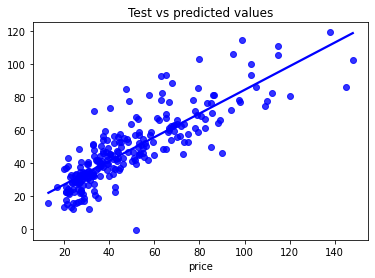

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b").set_title("Test vs predicted values")

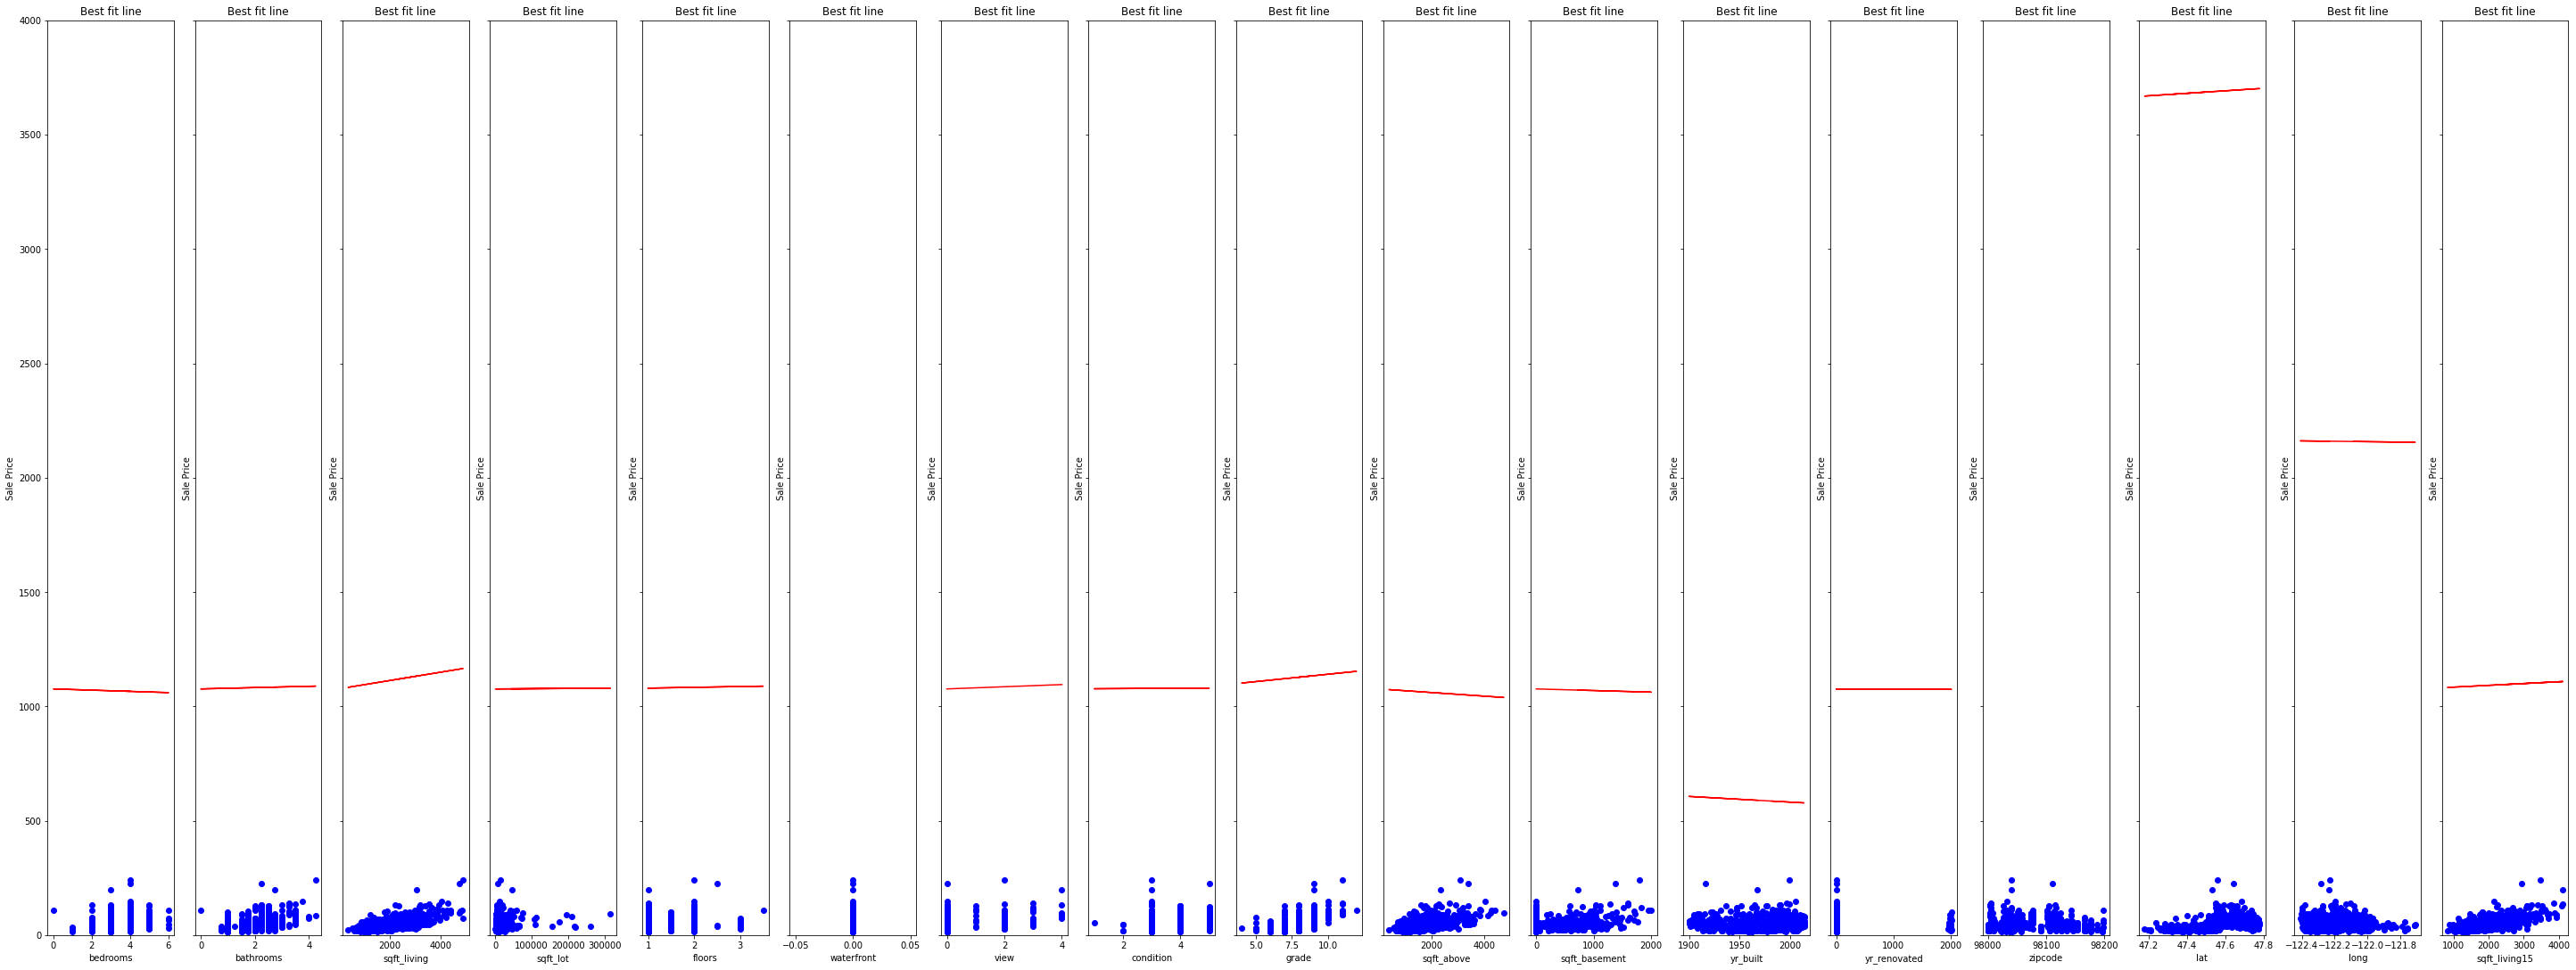

In [ ]:
fig, axes = plt.subplots(1,len(X_train.columns),sharey=True,constrained_layout=True,figsize=(40,15))

for i,f in enumerate(X_train.columns):

  X_train_dep= X_train.copy()
  X_train_dep.loc[:, X_train.columns != str(f)] = 0
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(f))
  axes[i].set_ylabel('Sale Price')
  #axes[i].scatter(X_train[e].values[:,np.newaxis], y_train, color='b')
  axes[i].scatter(X_train[f], y_train, color='b')
  #axes[i].plot(X_train[f], 
  #             regr.coef_[i]*X_train[f]+regr.intercept_, color='r')
  axes[i].plot(X_train[f], regr.predict(X_train_dep),  color='r')
  plt.ylim([0, 4000])

In [147]:
pi = permutation_importance(regr, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in pi.importances_mean.argsort()[::-1]:
    if pi.importances_mean[i] - 2 * pi.importances_std[i] > 0:
        print(f"{X_test.columns[i]} "
               f"{pi.importances_mean[i]:.3f}"
              f" +/- {pi.importances_std[i]:.3f}")

sqft_living 0.588 +/- 0.051
lat 0.237 +/- 0.022
yr_built 0.182 +/- 0.021
grade 0.162 +/- 0.022
sqft_above 0.104 +/- 0.017
sqft_living15 0.051 +/- 0.014
sqft_basement 0.047 +/- 0.009
bedrooms 0.017 +/- 0.006
floors 0.016 +/- 0.006
long 0.011 +/- 0.004
condition 0.003 +/- 0.001


In [ ]:
px.bar(x=X_test.columns, y=pi.importances_mean, error_y=pi.importances_std, labels ={'x':'', 'y':'Importance'})

**The most important features are Square footage of the house and  Latitude coordinate.**

In [154]:
regr3d= ElasticNet(l1_ratio=1, alpha =0).fit(X_train[['sqft_living', 'lat']], y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+05, tolerance: 4.966e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



In [155]:
y_pred3d = regr3d.predict(X_test[['sqft_living', 'lat']])
print(f'R2 score with 2 most important features:{metrics.r2_score(y_test,y_pred3d):.4}')

R2 score with 2 most important features:0.5795


In [24]:
# Create a mesh grid on which we will run our model
x_min, x_max = X_test.sqft_living.min(), X_test.sqft_living.max() 
y_min, y_max = X_test.lat.min(), X_test.lat.max() 
xrange = np.arange(x_min, x_max, 1)
yrange = np.arange(y_min, y_max, 0.05)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = regr3d.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

fig = px.scatter_3d(x=X_test['sqft_living'], y=X_test['lat'], z=y_test, labels ={'x':'sqft_living', 'y':'lat', 'z':'price'})
fig.update_traces(name='test', showlegend = True)
fig.add_traces(go.Scatter3d(x=X_train['sqft_living'], y=X_train['lat'], z=y_train, name='train', mode='markers'))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



#AdaBoost

###Standardization od data and running AdaBoost with default hyperparamters

In [156]:
scaler = StandardScaler()
scaler.fit(df)
df_standard = scaler.transform(df)
X=df_standard[:, :-1]
y=df_standard[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25 , random_state = 33)

In [157]:
abreg = AdaBoostRegressor()
regr = abreg.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print('R2 score for default parameters:')
print(metrics.r2_score(y_test,y_pred))

R2 score for default parameters:
0.6804698282737787


###Base estimators

In [158]:
lr = LinearRegression()
dtr1 = DecisionTreeRegressor(max_depth = 1)
dtr3 = DecisionTreeRegressor(max_depth = 3)
knr3 = KNeighborsRegressor(n_neighbors = 3)
knr5 = KNeighborsRegressor(n_neighbors = 5)
svr_rbf = SVR(kernel='rbf') 
svr_lin = SVR(kernel='linear')

In [159]:
tuned_parameters = {
    'base_estimator': [lr, dtr1, dtr3, knr3, knr5, svr_rbf, svr_lin],
    'learning_rate': (np.arange(0.1, 1.3, 0.2)),
    'loss': ['linear', 'square', 'exponential']  
}

abr= AdaBoostRegressor(random_state = 33)

model = GridSearchCV(abr, tuned_parameters, cv=10, scoring='r2')
model.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=33),
             param_grid={'base_estimator': [LinearRegression(),
                                            DecisionTreeRegressor(max_depth=1),
                                            DecisionTreeRegressor(max_depth=3),
                                            KNeighborsRegressor(n_neighbors=3),
                                            KNeighborsRegressor(), SVR(),
                                            SVR(kernel='linear')],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1]),
                         'loss': ['linear', 'square', 'exponential']},
             scoring='r2')

In [182]:
print(model.best_score_)
print(model.best_params_)

0.7026952402588448
{'base_estimator': SVR(), 'learning_rate': 0.1, 'loss': 'exponential'}


In [186]:
best_abr= AdaBoostRegressor(base_estimator = svr_rbf, learning_rate = 0.1, loss= 'exponential', random_state = 33)
best_fit = best_abr.fit(X_train, y_train)

# y_pred=best_fit.predict(X_test)
# print(metrics.r2_score(y_pred,y_test))

In [166]:
pi = permutation_importance(best_fit, X_test, y_test,
                           n_repeats=10,
                           random_state=33)

In [167]:
px.bar(x=df.columns[:-1], y=pi.importances_mean, error_y=pi.importances_std, labels ={'x':'', 'y':'Importance'})

In [179]:
pi.importances_mean.argsort()[-18:]

array([12,  5,  0, 10,  7,  6,  3,  4, 13, 15,  1,  9,  2, 16, 11,  8, 14])

In [170]:
features = pi.importances_mean.argsort()[-2:]
regr2d=best_abr.fit(X_train[:,features ], y_train)
y_pred2d = regr2d.predict(X_test[:, features])
print(f'R2 score with most important feature:{metrics.r2_score(y_test,y_pred2d):.4}')

R2 score with most important feature:0.7451


**$R^2$ is higher for only 2 most important features taken into account, so it is worth checking how number of features affects the score.**

[0.745083548791567, 0.7558357408758916, 0.8177546458671692, 0.8073797074089719, 0.791397059322269, 0.7921549040067987, 0.7976430661450001, 0.8062241497640066, 0.8089717601038884, 0.8122870461596935, 0.8136786293974065, 0.8150742109605571, 0.8028843759848054, 0.7979371411815107, 0.799051485012267, 0.777060037110139]


Text(0, 0.5, 'R2 score')

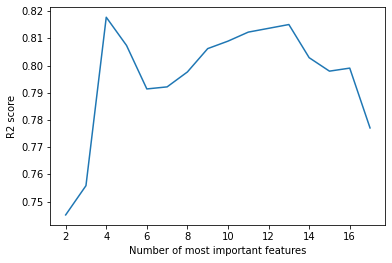

In [180]:
num_feats=list(range(2,18))
score=[]
for n in num_feats:
    features = pi.importances_mean.argsort()[-n:]
    regr2d=best_abr.fit(X_train[:,features ], y_train)
    y_pred2d = regr2d.predict(X_test[:, features])
    score.append(metrics.r2_score(y_test,y_pred2d))
print(score)    
plt.plot(num_feats,score) 
plt.xlabel('Number of most important features')
plt.ylabel('R2 score')

**The best $R^2$ score is obtained for 3 most important features and equals 81.78%**

In [187]:
features = pi.importances_mean.argsort()[-3:]
regr2d=best_abr.fit(X_train[:,features ], y_train)
y_pred2d = regr2d.predict(X_test[:, features])

In [205]:
features = pi.importances_mean.argsort()[-3:]
X=X_train[:,pi.importances_mean.argsort()[-1]]
X_t = X_test[:,pi.importances_mean.argsort()[-1]]
@interact(estimator=widgets.Dropdown(options=[lr, dtr1, dtr3, knr3, knr5, svr_rbf, svr_lin], value=svr_rbf, description='Base estimator for AdaBoost:', style= {'description_width': 'initial'}))
def different_estimator(estimator):
  model = AdaBoostRegressor(base_estimator = estimator, learning_rate = 0.1, loss= 'exponential', random_state = 33)
  regr2d=model.fit(X_train[:,features ], y_train)
  y_pred2d = regr2d.predict(X_test[:, features])
  fig = go.Figure([
      go.Scatter(x=X, y=y_train, name='train', mode='markers'),
      go.Scatter(x=X_t, y=y_test, name='test', mode='markers'),
      go.Scatter(x=np.sort(X_t), y=y_pred2d[X_t.argsort()], name='prediction')
    ])
  fig.update_layout(xaxis_title="Latitude coordinate, standardized", yaxis_title="Price of house, standardized")
  return fig.show(renderer="colab")


interactive(children=(Dropdown(description='Base estimator for AdaBoost:', index=5, options=(LinearRegression(…

#TO DO: BaggingRegressor